# Tecnologico de Costa Rica - Fundatec
# Programa Ciencia de Datos
## Mineria de Datos e Inteligencia de Negocios
### Prof. Lorena Zuñiga
### Estudiante Sergio Castillo Segura

### Proyecto Final - Lluvia en Australia

In [12]:
install.packages("FactoMineR")
install.packages("dendextend")
install.packages("purrr")
install.packages("ggpubr")
install.packages("arules")
install.packages("arulesViz")

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
also installing the dependencies ‘ggsci’, ‘cowplot’, ‘ggsignif’

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


In [13]:
#Importacion de modulos
library(tibble)
library(stringr)
library(rvest)
library(FactoMineR)
library(ggplot2)
library(dendextend)
library(plyr)
library(purrr)
library(ggplot2)
library(ggpubr)
library(arules)
library(arulesViz)

Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names


Attaching package: ‘ggpubr’

The following object is masked from ‘package:plyr’:

    mutate

The following object is masked from ‘package:dendextend’:

    rotate

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


In [17]:
library(repr)

# Entendimiento del Negocio
## Objetivos de Negocio
Como organismo dedicado al entendimiento y mejoramiento de la materia meteorológica, nos propnemos mejorar el bienestar de la ciudadanía proveyendo mejores elementos para la predicción del clima en Australia.

## Criterios de éxito (negocio)
Actualmente logramos predecir con éxito el 70% de todas las instancias meteorológicas del país, subir ese porcentaje a 75% proveería de mayores capacidades y confianza al organismo.

## Objetivos de minería de datos
Se requiere generar un modelo predictivo que permita determina con un 90% de precisión la presencia de lluvia dentro de las siguientes 24 horas de acuerdo a los datos meteorológicos tomados durante el día y proyectando los registros diarios obtenidos durante los últimos 10 años.

El modelo debe ser capaz de predecir lluvia para cualquiera de las 40 localidades presentes en el dataset provisto.

## Criterios de éxito (minería de datos)
El modelo también debería poder predecir lluvia en los siguientes 3 días con un porcentaje de precisión del 75%

# Entendimiento de Datos
Se dispone de un dataset que contiene las medidas meteorológicas de las 40 localidades Australianas que se quieren incluir en el modelo predictivo, a razón de un registro por día por localidad para los últimos 10 años.

El dataset es provisto en un archivo de texto con formato CSV con valores numéricos y textuales, contiene 24 columnas y 142193 registros, para efectos de este estudio el dataset obtenido es estático, por lo que si existen nuevos registros el modelo generado deberá ser vuelto a entrenar para incluirlos.

A continuación una descripción de cada columna contenida en el dataset a utilizar:

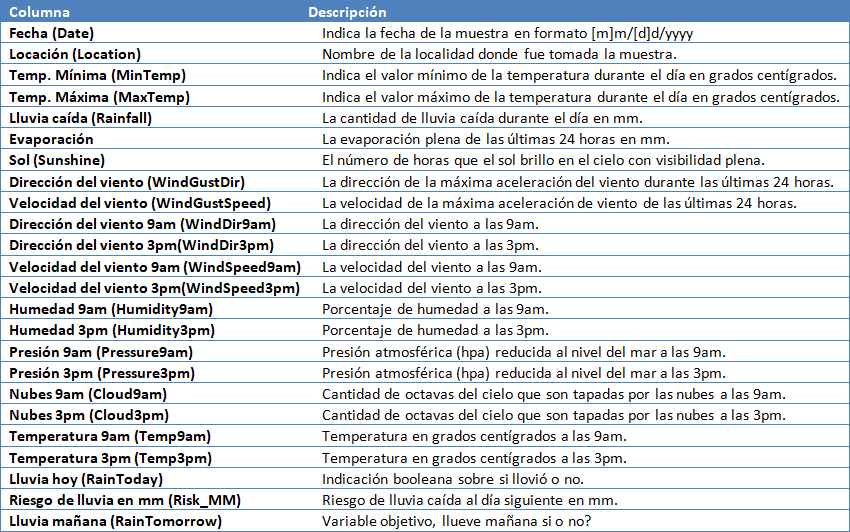

## Exploración de datos, limpieza y verificaciones de calidad

In [3]:
#Cargar dataset
data = read.csv("~/library/weatherAUS.csv", sep=",", header = TRUE, stringsAsFactors = FALSE)

ERROR: Error in eval(expr, envir, enclos): object 'data.length' not found


In [5]:
str(data)

'data.frame':	142193 obs. of  24 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007

Vemos que hay varios valores NA, por lo que procedemos a verificar y eliminar de ser necesario

In [6]:
#Revisamos si hay valores NA o nulos
anyNA(data)

[1] TRUE

In [8]:
#Eliminamos los valores nulos y revisamos cuantos valores completos nos quedan
data2 = na.omit(data)
anyNA(data2)
str(data2)

[1] FALSE

'data.frame':	56420 obs. of  24 variables:
 $ Date         : chr  "2009-01-01" "2009-01-02" "2009-01-04" "2009-01-05" ...
 $ Location     : chr  "Cobar" "Cobar" "Cobar" "Cobar" ...
 $ MinTemp      : num  17.9 18.4 19.4 21.9 24.2 27.1 23.3 16.1 19 19.7 ...
 $ MaxTemp      : num  35.2 28.9 37.6 38.4 41 36.1 34 34.2 35.5 35.5 ...
 $ Rainfall     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Evaporation  : num  12 14.8 10.8 11.4 11.2 13 9.8 14.6 12 11 ...
 $ Sunshine     : num  12.3 13 10.6 12.2 8.4 0 12.6 13.2 12.3 12.7 ...
 $ WindGustDir  : chr  "SSW" "S" "NNE" "WNW" ...
 $ WindGustSpeed: int  48 37 46 31 35 43 41 37 48 41 ...
 $ WindDir9am   : chr  "ENE" "SSE" "NNE" "WNW" ...
 $ WindDir3pm   : chr  "SW" "SSE" "NNW" "WSW" ...
 $ WindSpeed9am : int  6 19 30 6 17 7 17 15 30 15 ...
 $ WindSpeed3pm : int  20 19 15 6 13 20 19 6 9 17 ...
 $ Humidity9am  : int  20 30 42 37 19 26 33 25 46 61 ...
 $ Humidity3pm  : int  13 8 22 22 15 19 15 9 28 14 ...
 $ Pressure9am  : num  1006 1013 1012 1013 1011 ...
 $ Pre

Como podemos observar, el dataset se redujo a un 40% de su tamaño original, sin embargo 56420 valores deberían ser suficientes para un modelo completo.

Ahora revisaremos la calidad de los datos variable por variable

In [34]:
options(repr.plot.width=10, repr.plot.height=3)
gghistogram(data2, x = "Location", y = "..count..", stat="count", x.text.angle = 45, width = 1)

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [35]:
gghistogram(data2, x = "MinTemp", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Temperatura minima") + scale_x_continuous(breaks = seq(-20, 40, by = 2))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [37]:
gghistogram(data2, x = "MaxTemp", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Temperatura maxima") + scale_x_continuous(breaks = seq(0, 100, by = 2))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [43]:
gghistogram(data2, x = "Rainfall", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Cantidad de lluvia mm") + scale_x_continuous(breaks = seq(0, 300, by = 10))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

Hay una dispersión muy alta hacia la derecha con muy pocos valores, mejor eliminaremos aquellos que superen los 100mm.

In [86]:
sprintf("Registros previos: %i", nrow(data2))
data3 = subset(data2, data2$Rainfall < 100)
gghistogram(data3, x = "Rainfall", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Cantidad de lluvia mm") #+ scale_x_continuous(breaks = seq(0, 100, by = 2))
sprintf("Registros posteriores: %i", nrow(data3))
sprintf("Diferencia: %i", nrow(data2) - nrow(data3))

[1] "Registros previos: 56420"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 56397"

[1] "Diferencia: 23"

Tan solo perdimos 23 registros por lo que podemos tener un buen modelo.

In [55]:
gghistogram(data3, x = "Evaporation", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Evaporacion mm") #+ scale_x_continuous(breaks = seq(0, 100, by = 2))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [ ]:
Nuevamente mucha dispersion a la derecha, removemos valores mayores a 40.

In [85]:
sprintf("Registros previos: %i", nrow(data3))
data4 = subset(data3, data3$Evaporation < 40)
gghistogram(data4, x = "Evaporation", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Evaporacion mm") + scale_x_continuous(breaks = seq(0, 40, by = 1))
sprintf("Registros posteriores: %i", nrow(data4))
sprintf("Diferencia: %i", nrow(data3) - nrow(data4))

[1] "Registros previos: 56397"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 56371"

[1] "Diferencia: 26"

In [59]:
gghistogram(data4, x = "Sunshine", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Presencia del sol horas") #+ scale_x_continuous(breaks = seq(0, 40, by = 1))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [60]:
gghistogram(data4, x = "WindGustDir", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Direccion del viento") #+ scale_x_continuous(breaks = seq(0, 40, by = 1))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [61]:
gghistogram(data4, x = "WindGustSpeed", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Velocidad del viento") #+ scale_x_continuous(breaks = seq(0, 40, by = 1))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [84]:
#Eliminaremos valores mayores a 90
sprintf("Registros previos: %i", nrow(data4))
data5 = subset(data4, data4$WindGustSpeed < 90)
gghistogram(data5, x = "WindGustSpeed", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB", title= "Velocidad del viento") + scale_x_continuous(breaks = seq(0, 90, by = 5))
sprintf("Registros posteriores: %i", nrow(data5))
sprintf("Diferencia: %i", nrow(data4) - nrow(data5))

[1] "Registros previos: 56371"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 56126"

[1] "Diferencia: 245"

In [66]:
gghistogram(data5, x = "WindDir9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") #+ scale_x_continuous(breaks = seq(0, 90, by = 5))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [65]:
gghistogram(data5, x = "WindSpeed9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") #+ scale_x_continuous(breaks = seq(0, 90, by = 5))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [83]:
#Eliminaremos valores mayores a 50
sprintf("Registros previos: %i", nrow(data5))
data6 = subset(data5, data5$WindSpeed9am < 50)
gghistogram(data6, x = "WindSpeed9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") + scale_x_continuous(breaks = seq(0, 50, by = 2))
sprintf("Registros posteriores: %i", nrow(data6))
sprintf("Diferencia: %i", nrow(data5) - nrow(data6))

[1] "Registros previos: 56126"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 56001"

[1] "Diferencia: 125"

In [69]:
gghistogram(data6, x = "WindSpeed3pm", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [82]:
#Eliminaremos valores mayores a 55
sprintf("Registros previos: %i", nrow(data6))
data7 = subset(data6, data6$WindSpeed3pm < 55)
gghistogram(data7, x = "WindSpeed3pm", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") + scale_x_continuous(breaks = seq(0, 55, by = 2))
sprintf("Registros posteriores: %i", nrow(data7))
sprintf("Diferencia: %i", nrow(data6) - nrow(data7))

[1] "Registros previos: 56001"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 55983"

[1] "Diferencia: 18"

In [73]:
gghistogram(data7, x = "Humidity9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [74]:
gghistogram(data7, x = "Humidity3pm", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [76]:
gghistogram(data7, x = "Pressure9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") + scale_x_continuous(breaks = seq(900, 1100, by = 10))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [81]:
#Eliminaremos valores menores a 990
dsStart = data7
sprintf("Registros previos: %i", nrow(dsStart))
dsEnd = subset(dsStart, dsStart$Pressure9am > 990)
gghistogram(dsEnd, x = "Pressure9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") + scale_x_continuous(breaks = seq(900, 1100, by = 2))
sprintf("Registros posteriores: %i", nrow(dsStart))
sprintf("Diferencia: %i", nrow(dsStart) - nrow(dsEnd))
data8 = dsEnd

[1] "Registros previos: 55983"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 55983"

[1] "Diferencia: 34"

In [78]:
gghistogram(data8, x = "Pressure3pm", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [80]:
#Eliminaremos valores menores a 990 igual que el anterior
dsStart = data8
sprintf("Registros previos: %i", nrow(dsStart))
dsEnd = subset(dsStart, dsStart$Pressure3pm > 990)
gghistogram(dsEnd, x = "Pressure3pm", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") + scale_x_continuous(breaks = seq(900, 1100, by = 2))
sprintf("Registros posteriores: %i", nrow(dsEnd))
sprintf("Diferencia: %i", nrow(dsStart) - nrow(dsEnd))
data9 = dsEnd

[1] "Registros previos: 55949"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 55926"

[1] "Diferencia: 23"

In [87]:
gghistogram(data9, x = "Cloud9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [88]:
gghistogram(data9, x = "Temp9am", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [89]:
gghistogram(data9, x = "Temp3pm", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [94]:
gghistogram(data9, x = "RainTomorrow", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

In [93]:
gghistogram(data9, x = "RISK_MM", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") + scale_x_continuous(breaks = seq(0, 400, by = 10))

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

Parece que el valor a predecir tiene muchos outliers con valores muy altos que de seguro romperán el esquema, mejor eliminarlos.

In [144]:
#Eliminaremos valores mayores a 50mm
dsStart = data9
sprintf("Registros previos: %i", nrow(dsStart))
dsEnd = subset(dsStart, dsStart$RISK_MM < 50)
gghistogram(dsEnd, x = "RISK_MM", y = "..count..", stat="count", x.text.angle = 45, width = 0.1, color = "#00AFBB") + scale_x_continuous(breaks = seq(0, 50, by = 2))
sprintf("Registros posteriores: %i", nrow(dsEnd))
sprintf("Diferencia: %i", nrow(dsStart) - nrow(dsEnd))
data10 = dsEnd

[1] "Registros previos: 55926"

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

[1] "Registros posteriores: 55562"

[1] "Diferencia: 364"

# Preparacion de los datos
## Selección de datos y transformaciones
El dataset nos provee 2 variables que podríamos utilizar para la predicción, en caso de clasificación se puede utilizar "RainTomorrow" que simplemente indica si lloverá o no, mientras que la variables "Risk_MM" me dice no solo si lloverá sino también la posible cantidad de lluvia esperada en mm para ejecutar una regresión linel.

Esta última variable parece más apropiada y útil para este estudio por lo que será la elegida para la predicción.

No será necesario construir nuevos datos, la limpieza se realizó en la fase anterior, a continuacón las transformaciones de los factores no numéricos.

In [146]:
#Conversión a factores de valores no numéricos
lmData = data10[,-c(24)] #Eliminamos la variable "RainTomorrow" para la prediccion
lmData$Date = as.factor(lmData$Date)
lmData$Location = as.factor(lmData$Location)
lmData$WindGustDir = as.factor(lmData$WindGustDir)
lmData$WindDir9am = as.factor(lmData$WindDir9am)
lmData$WindDir3pm = as.factor(lmData$WindDir3pm)
lmData$RainToday = as.factor(lmData$RainToday)
str(lmData)

'data.frame':	55562 obs. of  23 variables:
 $ Date         : Factor w/ 3416 levels "2007-11-01","2007-11-02",..: 408 409 411 412 413 414 415 416 417 418 ...
 $ Location     : Factor w/ 26 levels "AliceSprings",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ MinTemp      : num  17.9 18.4 19.4 21.9 24.2 27.1 23.3 16.1 19 19.7 ...
 $ MaxTemp      : num  35.2 28.9 37.6 38.4 41 36.1 34 34.2 35.5 35.5 ...
 $ Rainfall     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Evaporation  : num  12 14.8 10.8 11.4 11.2 13 9.8 14.6 12 11 ...
 $ Sunshine     : num  12.3 13 10.6 12.2 8.4 0 12.6 13.2 12.3 12.7 ...
 $ WindGustDir  : Factor w/ 16 levels "E","ENE","ESE",..: 12 9 6 15 15 4 12 10 2 5 ...
 $ WindGustSpeed: int  48 37 46 31 35 43 41 37 48 41 ...
 $ WindDir9am   : Factor w/ 16 levels "E","ENE","ESE",..: 2 11 6 15 8 4 9 10 2 6 ...
 $ WindDir3pm   : Factor w/ 16 levels "E","ENE","ESE",..: 13 11 7 16 15 15 11 9 16 16 ...
 $ WindSpeed9am : int  6 19 30 6 17 7 17 15 30 15 ...
 $ WindSpeed3pm : int  20 19 15 6 13 20 19 6 9 17 ...
 

# Fase de modelado
## Seleccion de técnicas
Como estamos trabajando con un caso de regresión lineal, entrenaremos 2 modelos seleccionando distintas variables para cada uno.
### Modelo 1
Selección de únicamente variables numéricas y la ubicación que deberia ser importante pues el clima cambia de acuerdo a esta.

In [147]:
#Modelo 1
lmData1 = lmData[, -c(1, 8, 10, 11)] #Eliminamos variables Date, WindGustDir, WindDir9am, WindDir3pm
str(lmData1)

'data.frame':	55562 obs. of  19 variables:
 $ Location     : Factor w/ 26 levels "AliceSprings",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ MinTemp      : num  17.9 18.4 19.4 21.9 24.2 27.1 23.3 16.1 19 19.7 ...
 $ MaxTemp      : num  35.2 28.9 37.6 38.4 41 36.1 34 34.2 35.5 35.5 ...
 $ Rainfall     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Evaporation  : num  12 14.8 10.8 11.4 11.2 13 9.8 14.6 12 11 ...
 $ Sunshine     : num  12.3 13 10.6 12.2 8.4 0 12.6 13.2 12.3 12.7 ...
 $ WindGustSpeed: int  48 37 46 31 35 43 41 37 48 41 ...
 $ WindSpeed9am : int  6 19 30 6 17 7 17 15 30 15 ...
 $ WindSpeed3pm : int  20 19 15 6 13 20 19 6 9 17 ...
 $ Humidity9am  : int  20 30 42 37 19 26 33 25 46 61 ...
 $ Humidity3pm  : int  13 8 22 22 15 19 15 9 28 14 ...
 $ Pressure9am  : num  1006 1013 1012 1013 1011 ...
 $ Pressure3pm  : num  1004 1012 1009 1009 1007 ...
 $ Cloud9am     : int  2 1 1 1 1 8 3 1 1 1 ...
 $ Cloud3pm     : int  5 1 6 5 6 8 1 1 5 5 ...
 $ Temp9am      : num  26.6 20.3 28.7 29.1 33.6 30.7 25 20.7 23.4 2

In [148]:
set.seed(123) #Seed para el sampling aleatorio

smp_size <- floor(0.75 * nrow(lmData1))
train_ind <- sample(seq_len(nrow(lmData1)), size = smp_size)
train1 <- lmData1[train_ind, ]
test1 <- lmData1[-train_ind, ]
sprintf("Rows in train: %i, and in test: %i", nrow(train1), nrow(test1))

[1] "Rows in train: 41671, and in test: 13891"

In [149]:
#Construimos el modelo
lm1 = glm(RISK_MM ~ ., data = train1)
summary(lm1)


Call:
glm(formula = RISK_MM ~ ., data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-16.305   -1.885   -0.490    0.769   48.538  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              66.189189   4.526617  14.622  < 2e-16 ***
LocationBrisbane         -0.259586   0.157400  -1.649  0.09911 .  
LocationCairns           -0.552286   0.170993  -3.230  0.00124 ** 
LocationCanberra         -0.337055   0.202589  -1.664  0.09617 .  
LocationCobar             0.195111   0.252783   0.772  0.44021    
LocationCoffsHarbour     -0.308498   0.190001  -1.624  0.10446    
LocationDarwin           -0.042494   0.165316  -0.257  0.79714    
LocationHobart           -1.401159   0.177987  -7.872 3.57e-15 ***
LocationMelbourne        -0.889252   0.175183  -5.076 3.87e-07 ***
LocationMelbourneAirport -1.229021   0.159513  -7.705 1.34e-14 ***
LocationMildura           0.064422   0.158467   0.407  0.68435    
LocationMoree     

In [150]:
predicted1 = predict(lm1, test1)
predicted1[predicted1 < 0] = 0  #Corrector para valores negativos, RISK_MM siempre es positivo
actual1 = test1$RISK_MM
error1 = actual1 - predicted1
mae1 = mean(abs(error1))
rmse1 = sqrt(mean(error1^2))
sprintf("MAE modelo 1: %f", mae1)
sprintf("RMSE modelo 1: %f", rmse1)

[1] "MAE modelo 1: 2.122392"

[1] "RMSE modelo 1: 4.405475"

### Modelo 2
Selección de variables numéricas sin la ubicación, para verificar si nuestra hipótesis de que la ubicación es importante para definir la predicción, y sin la variable de lluvia hoy para ver si es importante en el modelo.

In [168]:
train2 = train1[-c(1, 18)]
test2 = test1[-c(1, 18)]
str(train2)

'data.frame':	41671 obs. of  17 variables:
 $ MinTemp      : num  21.5 4.4 10.2 17.7 16.5 19.3 22.7 15.6 13.7 7.1 ...
 $ MaxTemp      : num  23.7 15.4 30.7 25.6 19 26.4 33.1 21.9 25.4 16.4 ...
 $ Rainfall     : num  6.2 0 0 2.6 2.4 1.2 0 0 0.2 0.8 ...
 $ Evaporation  : num  3.4 1.4 5.2 3.6 2.4 5 5.8 4 2.8 1.2 ...
 $ Sunshine     : num  0.5 9.4 10.6 8.8 0 1.5 8.7 9.5 9.4 3.2 ...
 $ WindGustSpeed: int  41 37 28 54 31 44 31 46 15 20 ...
 $ WindSpeed9am : int  24 13 9 13 17 31 7 6 7 11 ...
 $ WindSpeed3pm : int  19 22 6 19 13 22 17 26 6 13 ...
 $ Humidity9am  : int  90 73 53 93 74 75 76 78 76 89 ...
 $ Humidity3pm  : int  92 35 21 70 66 68 65 74 48 66 ...
 $ Pressure9am  : num  1002 1027 1023 1006 1020 ...
 $ Pressure3pm  : num  1003 1025 1020 1007 1019 ...
 $ Cloud9am     : int  8 1 1 7 8 7 7 6 1 8 ...
 $ Cloud3pm     : int  8 1 3 4 7 6 7 6 1 8 ...
 $ Temp9am      : num  21.9 8.7 18.9 19.3 16.6 21.7 26.9 19.3 18.6 11.9 ...
 $ Temp3pm      : num  20.6 14.9 29.8 22.8 18.3 24.3 29 19.2 23.6 

In [169]:
#Construimos el modelo
lm2 = glm(RISK_MM ~ ., data = train2)
summary(lm2)


Call:
glm(formula = RISK_MM ~ ., data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-17.598   -1.890   -0.498    0.748   47.918  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   66.441514   4.428305  15.004  < 2e-16 ***
MinTemp       -0.075440   0.011255  -6.703 2.07e-11 ***
MaxTemp        0.157834   0.022132   7.131 1.01e-12 ***
Rainfall       0.130885   0.003871  33.815  < 2e-16 ***
Evaporation    0.039730   0.009571   4.151 3.31e-05 ***
Sunshine      -0.309895   0.010687 -28.999  < 2e-16 ***
WindGustSpeed  0.094948   0.002927  32.442  < 2e-16 ***
WindSpeed9am  -0.004628   0.003696  -1.252  0.21053    
WindSpeed3pm  -0.078819   0.003870 -20.368  < 2e-16 ***
Humidity9am   -0.007600   0.002512  -3.025  0.00249 ** 
Humidity3pm    0.097711   0.002844  34.352  < 2e-16 ***
Pressure9am    0.320749   0.014436  22.219  < 2e-16 ***
Pressure3pm   -0.391464   0.014538 -26.927  < 2e-16 ***
Cloud9am      -0.079934   0.011701  -6

In [170]:
predicted2 = predict(lm2, test2)
predicted2[predicted2 < 0] = 0
actual2 = test2$RISK_MM
error2 = actual2 - predicted2
mae2 = mean(abs(error2))
rmse2 = sqrt(mean(error2^2))
sprintf("Promedio RISK_MM: %f", mean(lmData$RISK_MM))
sprintf("Promedio RISK_MM modelo 1: %f", mean(predicted1))
sprintf("Promedio RISK_MM modelo 2: %f", mean(predicted2))
sprintf("MAE modelo 1: %f", mae1)
sprintf("MAE modelo 2: %f", mae2)
sprintf("RMSE modelo 1: %f", rmse1)
sprintf("RMSE modelo 2: %f", rmse2)

[1] "Promedio RISK_MM: 1.800966"

[1] "Promedio RISK_MM modelo 1: 2.069675"

[1] "Promedio RISK_MM modelo 2: 2.058480"

[1] "MAE modelo 1: 2.122392"

[1] "MAE modelo 2: 2.128783"

[1] "RMSE modelo 1: 4.405475"

[1] "RMSE modelo 2: 4.431763"

# Resultados
- Como podemos observar ambos modelos dan resultados muy similares, lo que implica que efectivamente ni la ubicación ni el valor de lluvia hoy son importantes para el estudio.
- No se utilizaron todas las variables factores debido a que alargaba el tiempo de entrenamiento de los modelos considerablemente.
- El resultado obtenido se puede considerar bueno, aunque preferiría utilizar deep learning para ver si se puede mejorar.
- Un modelo de clasificación probablemente habría obtenido mejores resultados pero quería experimentar con regresión.
- El primer modelo obtiene un error promedio y un RMSE apenas inferiores que el segundo modelo.
- A razón de elegir un modelo pues elegiría el primero solo por tener resultados apenas mejores que el segundo.

# Extracción de resultados

In [172]:
export = test1
export$prediction1 = predicted1
export$prediction2 = predicted2
ex = merge(export, lmData, by = "row.names", all.x = T)[,1:23]
head(ex)

Row.names Location.x   MinTemp.x MaxTemp.x Rainfall.x Evaporation.x
1 10000     CoffsHarbour 23.5      30.8      2           7.2         
2 100006    Nuriootpa    22.0      41.9      0          14.8         
3 100012    Nuriootpa    12.6      36.1      0          10.6         
4 100015    Nuriootpa    16.9      24.6      0          18.2         
5 10002     CoffsHarbour 19.5      31.8      0           6.6         
6 100032    Nuriootpa    12.9      30.0      0           8.8         
  Sunshine.x WindGustSpeed.x WindSpeed9am.x WindSpeed3pm.x ... Pressure3pm.x
1  6.1       41               7             13             ... 1004.0       
2 12.7       54               9             15             ... 1008.6       
3 12.3       30               9             15             ... 1007.5       
4  5.0       43              13             17             ... 1014.3       
5  9.1       48              11             17             ... 1001.6       
6 12.1       37              19             13             ... 1015.9       
  Cloud9am.x Cloud3pm.x Temp9am.x Temp3pm.x RainToday.x RISK_MM.x prediction1
1 8          2          24.2      28.1      Yes         2.6       5.6918889  
2 2          3          34.4      40.4      No          0.0       0.3812353  
3 0          0          22.2      34.7      No          0.0       0.0000000  
4 6          7          19.4      24.0      No          0.0       0.6411017  
5 5          5          24.5      29.5      No          0.0       2.8434991  
6 2          3          16.7      28.6      No          0.0       0.0000000  
  prediction2 Date      
1 5.2571517   2012-01-09
2 0.7658774   2009-01-30
3 0.0000000   2009-02-05
4 0.6793491   2009-02-08
5 2.8824153   2012-01-11
6 0.0000000   2009-02-25

In [173]:
write.csv(ex, "export.csv")